In [36]:
import biolearn
from biolearn.data_library import DataLibrary
import seaborn as sns
import pandas as pd
import numpy as np
import time
import colorcet as cc
import scipy as sp
import matplotlib.pyplot as plt
from scipy import stats

def plot_cg(cg,dg,ax,ylim=[0,1],legend='off'):
    palette = sns.color_palette(cc.glasbey, n_colors=len(dg['Dataset'].unique()))[::-1]
    ax=sns.scatterplot(data=dg,x='age',y=cg,hue='Dataset',s=10,style='Dataset', 
                       markers=['o']*len(dg['Dataset'].unique()),palette=palette,ax=ax)
    #ax=sns.regplot(data=dg,x='age',y=cg,scatter=False,color='r',ax=ax)
    ax.set(xlim=[20,100])
    ax.set(ylim=ylim)
    ax.set(xlabel='Age');
    ax.set(ylabel='DNA  Methylation');
    ax.set(title=cg);
    sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))

In [38]:
%%time
geos=['GSE30870','GSE52588']#,'GSE41169','GSE69270','GSE73103','GSE51057','GSE40279','GSE51032','GSE42861']
elov=['cg16867657','cg24724428','cg21572722']
dfs=[]
metas=[]
for geo in geos:
    start_time = time.time()
    data_source = DataLibrary().get(geo)
    data=data_source.load()
    df=data.dnam
    df.columns=geo+'_'+df.columns
    meta=data.metadata
    meta.index=geo+'_'+meta.index
    dfs.append(df[df.index.isin(elov)])
    metas.append(meta)
    print(geo +': '+ str((time.time() - start_time)))
healthy=meta.copy()
#healthy=healthy[healthy['group']!='subject affected by Down syndrome (DS)']
#healthy=healthy[~healthy['disease_status'].isin(['Syndrome X','Down Syndrome and possibly Syndrome X','Turner Syndrome and possibly Syndrome X'])]
#healthy=healthy[~healthy['disease'].isin(['rheumatoid arthritis','2.0'])] # '1.0'=control
#healthy=healthy[~healthy['cancer'].isin(['C50','C18','C73','C19','C80'])].copy()

GSE30870: 5.643112659454346
GSE52588: 11.904736042022705
CPU times: user 16.9 s, sys: 675 ms, total: 17.5 s
Wall time: 17.5 s


In [46]:
df=pd.concat(dfs,axis=1).T.copy()
dh=df.join(healthy['age'],how='inner')
dh['Dataset']=dh.index.str.split('_').str[0]
dh.shape

(87, 5)

Text(0.5, 0.98, 'ELOVL2 Promoter CpGs')

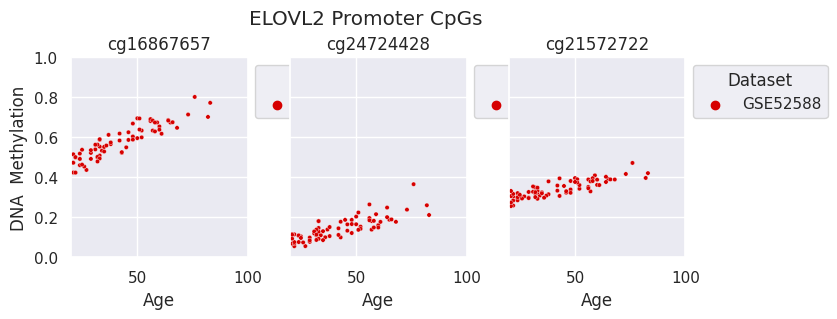

In [40]:
sns.set(rc={'figure.figsize':(7,3)})
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, sharey=True)
fig.tight_layout()
fig.subplots_adjust(top=.82)
plot_cg(elov[0],dh, ax1)
plot_cg(elov[1],dh, ax2)
plot_cg(elov[2],dh, ax3,legend='on')
fig.suptitle('ELOVL2 Promoter CpGs')